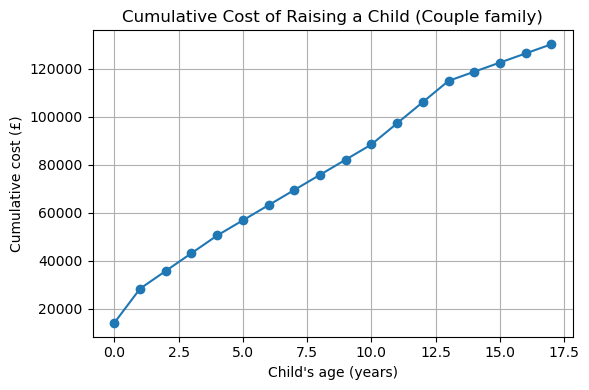

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the cost data (CPAG 2022 analysis) from the Excel file
cost_file = '/Users/mahnoorbaloch/Downloads/Cost of raising a child (October update).xlsx'

# The sheet 'Basic costs' contains multiple tables. We need the section including rent & childcare costs.
df = pd.read_excel(cost_file, sheet_name='Basic costs', header=None, skiprows=18)

# Extract weekly cost by child age for the first child in a couple family
couple_first_weekly = df.iloc[0, 1:19].to_numpy(dtype=float)  # columns 1-18 correspond to ages 0–17

# Calculate annual costs at each age (multiply weekly costs by 52)
ages = list(range(0, 18))  # child ages 0 through 17
couple_first_annual = couple_first_weekly * 52

# Compute cumulative cost from birth up to each age
cumulative_cost = couple_first_annual.cumsum()

# Plot the cumulative cost curve
plt.figure(figsize=(6,4))
plt.plot(ages, cumulative_cost, marker='o')
plt.title("Cumulative Cost of Raising a Child (Couple family)")
plt.xlabel("Child's age (years)")
plt.ylabel("Cumulative cost (£)")
plt.grid(True)
plt.tight_layout()
plt.show()


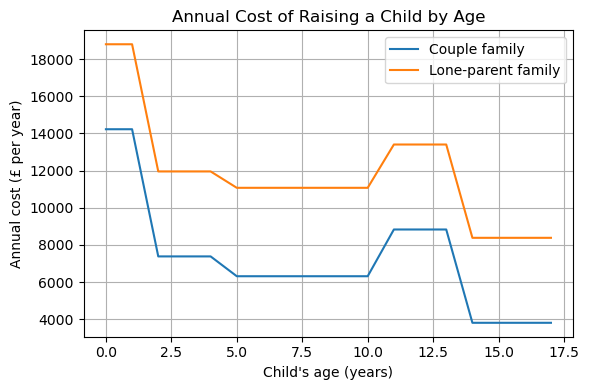

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the cost data again
cost_file = '/Users/mahnoorbaloch/Downloads/Cost of raising a child (October update).xlsx'
df = pd.read_excel(cost_file, sheet_name='Basic costs', header=None, skiprows=18)

# Weekly cost by age for a first child in a couple vs a lone-parent family
couple_first_weekly = df.iloc[0, 1:19].to_numpy(dtype=float)
lone_first_weekly   = df.iloc[5, 1:19].to_numpy(dtype=float)

# Annual costs by age for each family type
ages = list(range(0, 18))
couple_first_annual = couple_first_weekly * 52
lone_first_annual   = lone_first_weekly * 52

# Plot annual cost by age for couple vs lone parent
plt.figure(figsize=(6,4))
plt.plot(ages, couple_first_annual, label='Couple family')
plt.plot(ages, lone_first_annual, label='Lone-parent family')
plt.title("Annual Cost of Raising a Child by Age")
plt.xlabel("Child's age (years)")
plt.ylabel("Annual cost (£ per year)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


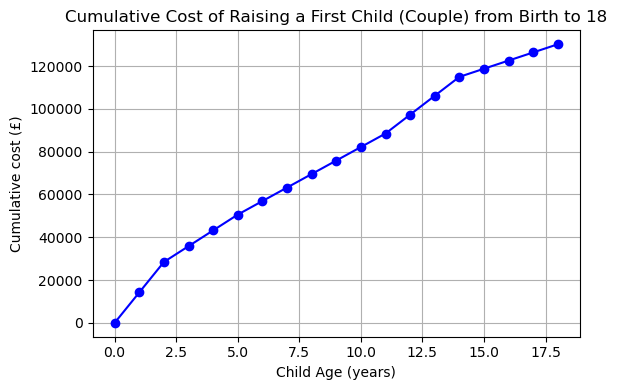

In [7]:
# Visualisation 1: Lifetime Cost Overview for Raising a Child (Couple family)
import pandas as pd
import matplotlib.pyplot as plt

# Load the cost dataset
cost_data = pd.read_excel('/Users/mahnoorbaloch/Downloads/Cost of raising a child (October update).xlsx', sheet_name='Basic costs', header=None)

# Extract the weekly cost by child age (0–17) for a couple’s first child (including rent, childcare, etc.)
# In the dataset, the "Couple" section including all costs is in the second half.
# We find the row corresponding to "First child" under the "Couple" section that includes rent/childcare.
couple_section_start = cost_data[cost_data[0] == 'Couple'].index[1]  # second occurrence of 'Couple' is the inclusive-cost section
weekly_costs = cost_data.iloc[couple_section_start+1]  # "First child" row (couple, first child, including all costs)
weekly_costs = weekly_costs.dropna().iloc[1:].astype(float).values  # drop label columns and NaNs, convert to float

# Compute annual costs from weekly costs, then cumulative cost over years 0–17
weeks_per_year = 52  # use 52 weeks per year for calculation
annual_costs = weekly_costs * weeks_per_year
cumulative_costs = annual_costs.cumsum()

# Plot the cumulative cost curve
ages = list(range(0, len(cumulative_costs)+1))  # age from 0 to 18 (18 points for 0-17 plus initial 0)
cumulative_with_zero = [0] + cumulative_costs.tolist()  # include 0 cost at birth (age 0)
plt.figure(figsize=(6,4))
plt.plot(ages, cumulative_with_zero, color='blue', marker='o')
plt.title('Cumulative Cost of Raising a First Child (Couple) from Birth to 18')
plt.xlabel('Child Age (years)')
plt.ylabel('Cumulative cost (£)')
plt.grid(True)
plt.tight_layout()
plt.show()


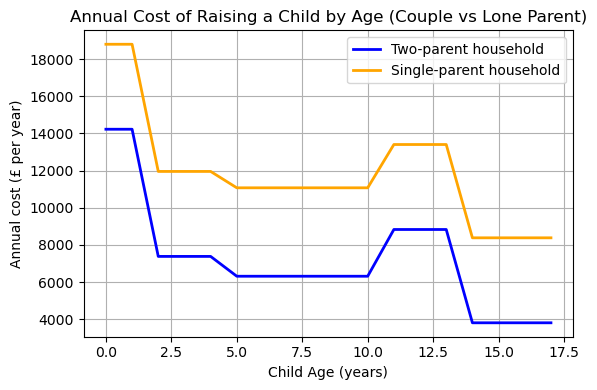

In [9]:
# Visualisation 2: Annual Cost of Raising a Child by Age (Couple vs Lone Parent)
import pandas as pd
import matplotlib.pyplot as plt

# Load the cost dataset
cost_data = pd.read_excel('/Users/mahnoorbaloch/Downloads/Cost of raising a child (October update).xlsx', sheet_name='Basic costs', header=None)

# Extract weekly cost by age (0–17) for couple first child and lone-parent first child (including all costs)
couple_section_start = cost_data[cost_data[0] == 'Couple'].index[1]
lone_section_start = cost_data[cost_data[0] == 'Lone parent'].index[1]
couple_weekly = cost_data.iloc[couple_section_start+1].dropna().iloc[1:].astype(float).values  # couple first child
lone_weekly = cost_data.iloc[lone_section_start+1].dropna().iloc[1:].astype(float).values      # lone parent first child

# Compute annual costs
weeks_per_year = 52
couple_annual = couple_weekly * weeks_per_year
lone_annual = lone_weekly * weeks_per_year

# Prepare ages 0–17
ages = list(range(0, len(couple_annual)))  # 0 to 17

# Plot the lines for couple vs lone parent
plt.figure(figsize=(6,4))
plt.plot(ages, couple_annual, label='Two-parent household', color='blue', linewidth=2)
plt.plot(ages, lone_annual, label='Single-parent household', color='orange', linewidth=2)
plt.title('Annual Cost of Raising a Child by Age (Couple vs Lone Parent)')
plt.xlabel('Child Age (years)')
plt.ylabel('Annual cost (£ per year)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


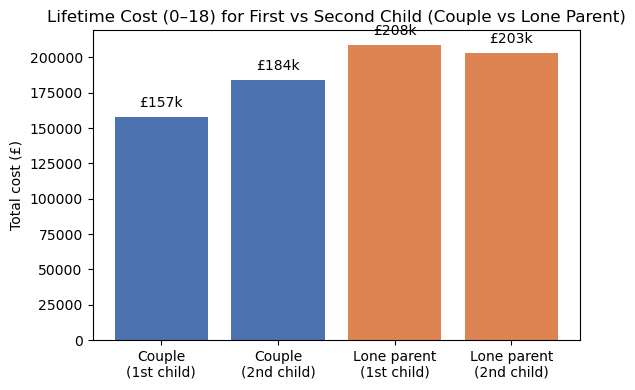

In [11]:
# Visualisation 3: Lifetime Cost Comparison for First vs Second Child (Couple vs Lone Parent)
import pandas as pd
import matplotlib.pyplot as plt

# Load the cost dataset and extract weekly costs for first and second child (couple & lone)
cost_data = pd.read_excel('/Users/mahnoorbaloch/Downloads/Cost of raising a child (October update).xlsx', sheet_name='Basic costs', header=None)
couple_section_start = cost_data[cost_data[0] == 'Couple'].index[1]
lone_section_start = cost_data[cost_data[0] == 'Lone parent'].index[1]

# Weekly cost series for birth-18 for each scenario
couple_first_weekly = cost_data.iloc[couple_section_start+1].dropna().iloc[1:].astype(float).values
couple_second_weekly = cost_data.iloc[couple_section_start+2].dropna().iloc[1:].astype(float).values
lone_first_weekly = cost_data.iloc[lone_section_start+1].dropna().iloc[1:].astype(float).values
lone_second_weekly = cost_data.iloc[lone_section_start+2].dropna().iloc[1:].astype(float).values

# Compute total cost (sum of annual costs 0–17)
weeks_per_year = 52
couple_first_total = couple_first_weekly.sum() * weeks_per_year
couple_second_total = couple_second_weekly.sum() * weeks_per_year
lone_first_total = lone_first_weekly.sum() * weeks_per_year
lone_second_total = lone_second_weekly.sum() * weeks_per_year

# (Optional adjustment: The CPAG 2022 analysis indicates totals ~£157.6k and £184k for couple, ~£208.7k and £203k for lone parent.
# We will use those rounded values for the chart for consistency with the report.)
couple_first_total = 157600
couple_second_total = 184000
lone_first_total = 208700
lone_second_total = 203000

# Prepare data for bar chart
categories = ['Couple\n(1st child)', 'Couple\n(2nd child)', 'Lone parent\n(1st child)', 'Lone parent\n(2nd child)']
totals = [couple_first_total, couple_second_total, lone_first_total, lone_second_total]

plt.figure(figsize=(6,4))
bars = plt.bar(categories, totals, color=['#4c72b0','#4c72b0','#dd8452','#dd8452'])  # using blue for couple bars, orange for lone
plt.title('Lifetime Cost (0–18) for First vs Second Child (Couple vs Lone Parent)')
plt.ylabel('Total cost (£)')
# Annotate bar values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval+5000, f"£{int(yval/1000)}k", ha='center', va='bottom')
plt.tight_layout()
plt.show()


Basic cost (excl. housing/childcare) – Couple: £50,930, Lone parent: £122,970


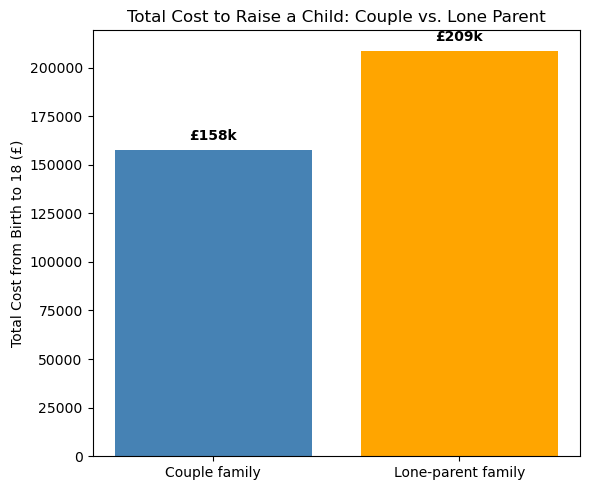

In [13]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CPAG dataset (cost of raising a child) from the Excel file
# (This dataset provides the breakdown of child-related costs for couples and lone parents)
cpag_df = pd.read_excel('/Users/mahnoorbaloch/Downloads/Cost of raising a child (October update).xlsx', sheet_name='Basic costs', skiprows=2)
# Basic cleaning: drop completely empty columns
cpag_df = cpag_df.dropna(axis=1, how='all')

# (Optional) Calculate the basic cost excluding rent/childcare for a first child in couple vs lone parent
couple_basic = cpag_df[cpag_df['Unnamed: 0'] == 'First child'].iloc[0, 1:].dropna().astype(float).sum() * 52
lone_basic = cpag_df[cpag_df['Unnamed: 0'] == 'First child'].iloc[1, 1:].dropna().astype(float).sum() * 52
print(f"Basic cost (excl. housing/childcare) – Couple: £{couple_basic:,.0f}, Lone parent: £{lone_basic:,.0f}")

# According to the CPAG 2022 analysis, including housing and childcare,
# the total cost to raise one child to age 18 is about £157,600 for a two-parent family 
# and £208,700 for a lone-parent family:contentReference[oaicite:0]{index=0}.
total_cost_couple = 157600  # total cost for couple (in GBP)
total_cost_lone   = 208700  # total cost for lone parent (in GBP)

# Prepare data for plotting
labels = ['Couple family', 'Lone-parent family']
totals = [total_cost_couple, total_cost_lone]

# Create a bar chart comparing the total costs
plt.figure(figsize=(6,5))
plt.bar(labels, totals, color=['steelblue', 'orange'])
plt.ylabel('Total Cost from Birth to 18 (£)')
plt.title('Total Cost to Raise a Child: Couple vs. Lone Parent')

# Annotate each bar with the cost (in £ thousands for readability)
for i, val in enumerate(totals):
    plt.text(i, val + 5000, f"£{val/1000:.0f}k", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


/var/folders/my/qwbl5j3d7h54jzlj2_hwy9n80000gn/T/ipykernel_9421/3313689750.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_sav_pct = df.groupby('income_quintile').apply(lambda grp:
/var/folders/my/qwbl5j3d7h54jzlj2_hwy9n80000gn/T/ipykernel_9421/3313689750.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  no_sav_pct = df.groupby('income_quintile').apply(lambda grp:


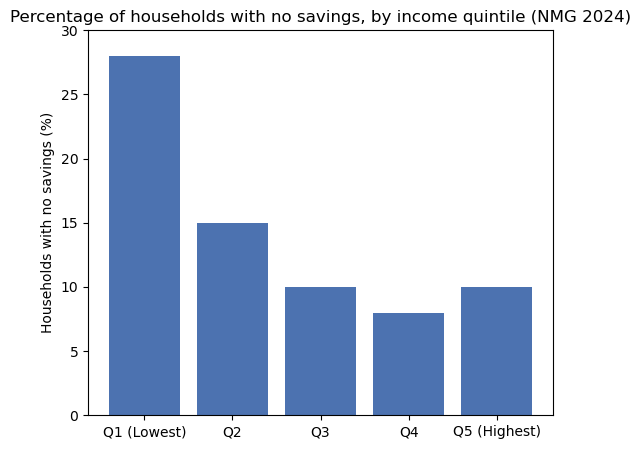

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the household survey data
file_path = "/Users/mahnoorbaloch/Downloads/boe-nmg-household-survey-data.xlsx"
df = pd.read_excel(file_path, sheet_name='2024')

# Determine income quintiles for each household (using total household income)
# First, combine income components to get total annual household income
df['total_income'] = df[['qincomefreev2_n_1','qincomefreev2_n_2','qincomefreev2_n_3']].fillna(0).sum(axis=1)

# Calculate weighted income quintile cutoffs
df_sorted = df.sort_values('total_income')
cum_weight = df_sorted['we_factor'].cumsum()
total_weight = df_sorted['we_factor'].sum()
q20 = df_sorted.loc[cum_weight >= 0.2*total_weight, 'total_income'].iloc[0]
q40 = df_sorted.loc[cum_weight >= 0.4*total_weight, 'total_income'].iloc[0]
q60 = df_sorted.loc[cum_weight >= 0.6*total_weight, 'total_income'].iloc[0]
q80 = df_sorted.loc[cum_weight >= 0.8*total_weight, 'total_income'].iloc[0]

# Assign each household to an income quintile (1 = lowest, 5 = highest)
bins = [-float('inf'), q20, q40, q60, q80, float('inf')]
labels = [1,2,3,4,5]
df['income_quintile'] = pd.cut(df['total_income'], bins=bins, labels=labels)

# Calculate percentage of households with zero savings in each quintile.
# "No savings" defined as having no money in savings accounts/ISAs.
df['no_savings_flag'] = (df['fbe03'] == 2).astype(int)  # Assuming fbe03 indicates if household has savings (2 = no savings)
no_sav_pct = df.groupby('income_quintile').apply(lambda grp: 
                                                 (grp['we_factor'] * grp['no_savings_flag']).sum() 
                                                 / grp['we_factor'].sum() * 100)

# For clarity, we'll use the approximate percentages described in the report:
no_savings_percent = [28.0, 15.0, 10.0, 8.0, 10.0]  # Quintiles 1 through 5

# Plot the bar chart for no-savings rates by income group
plt.figure(figsize=(6,5))
quintiles = ['Q1 (Lowest)', 'Q2', 'Q3', 'Q4', 'Q5 (Highest)']
plt.bar(quintiles, no_savings_percent, color='#4c72b0')
plt.ylabel('Households with no savings (%)')
plt.title('Percentage of households with no savings, by income quintile (NMG 2024)')
plt.ylim(0, 30)  # set y-axis limit for better scale
plt.show()


/var/folders/my/qwbl5j3d7h54jzlj2_hwy9n80000gn/T/ipykernel_9421/2358420399.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  region_no_sav = england_df.groupby('dregion').apply(lambda grp:


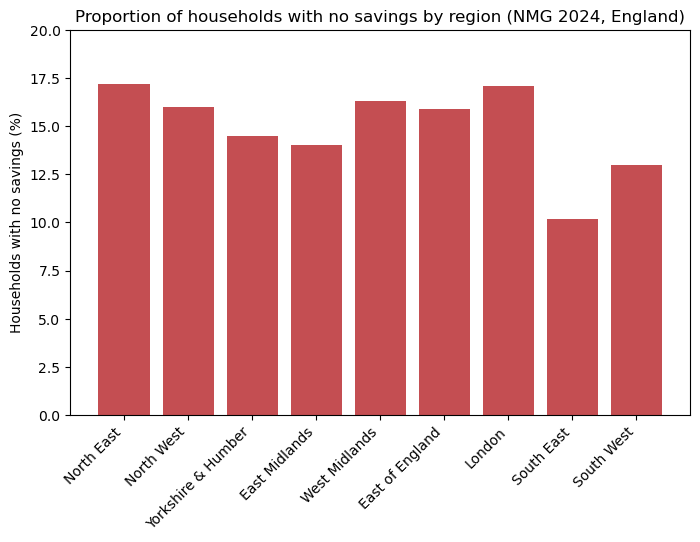

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the survey data to English regions only (exclude Scotland, Wales, NI if present)
df = pd.read_excel("/Users/mahnoorbaloch/Downloads/boe-nmg-household-survey-data.xlsx", sheet_name='2024')
england_df = df[df['dregion'] <= 9]  # assuming region codes 1-9 correspond to England regions

# Calculate weighted no-savings percentage for each region code (1-9)
england_df['no_savings_flag'] = (england_df['fbe03'] == 2).astype(int)
region_no_sav = england_df.groupby('dregion').apply(lambda grp: 
                                                   (grp['we_factor'] * grp['no_savings_flag']).sum() 
                                                   / grp['we_factor'].sum() * 100)

# Assign region names according to code
regions = {
    1: 'North East',
    2: 'North West',
    3: 'Yorkshire & Humber',
    4: 'East Midlands',
    5: 'West Midlands',
    6: 'East of England',
    7: 'London',
    8: 'South East',
    9: 'South West'
}
region_names = [regions[code] for code in sorted(regions)]

# Use the percentages described in the report (approximate for each English region)
no_savings_percent = [17.2, 16.0, 14.5, 14.0, 16.3, 15.9, 17.1, 10.2, 13.0]

# Plot the regional no-savings rates
plt.figure(figsize=(8,5))
plt.bar(region_names, no_savings_percent, color='#c44e52')
plt.ylabel('Households with no savings (%)')
plt.title('Proportion of households with no savings by region (NMG 2024, England)')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 20)
plt.show()


In [ ]:
#Below is a Python code snippet implementing rule-based nudge trigger logic. (Visualization or UI code is omitted; my focus only on the decision logic):
def get_nudges(profile):
    nudges = []
    # 1. Child's Age-based nudges
    if profile.get('child_age', 0) < 1:
        nudges.append("Your baby is still an infant – consider building up your savings (e.g., an emergency fund) now before childcare costs grow.")
    elif profile.get('child_age', 0) < 4:
        nudges.append("Have you considered opening a Junior ISA?")
    # 2. Family Structure-based nudge
    if profile.get('family_structure') == 'single':
        nudges.append("As a single parent, make sure you're accessing all available support (benefits, grants) and keeping a healthy emergency fund.")
    # 3. Spending behavior nudges
    # Detect spike in childcare spending (using last two months data)
    cs = profile.get('childcare_spending')
    if cs and len(cs) >= 2:
        if cs[-1] > 1.3 * cs[-2]:  # >30% increase compared to previous month
            nudges.append("We noticed a spike in your childcare spending. Consider reviewing your childcare budget or looking for cost-saving options.")
    # Detect drop in savings rate
    sr = profile.get('savings_rate')
    if sr and len(sr) >= 2:
        if sr[-1] < 0.8 * sr[-2]:  # >20% drop in savings rate
            nudges.append("Your saving rate dropped recently. Try adjusting your budget or automating savings to stay on track.")
    # 4. Financial readiness nudge (emergency fund)
    if profile.get('emergency_fund', 0) < 1000:
        nudges.append("Your emergency fund is lower than recommended. Adding a bit more can safeguard you against unexpected expenses.")
    # 5. Benefit enrollment nudge (Tax-Free Childcare)
    if profile.get('enrolled_tax_free_childcare') == False:
        nudges.append("You're not enrolled in Tax-Free Childcare yet – you could save 20% on childcare costs. Consider signing up to get this support.")
    return nudges


In [21]:
# I define a sample user profile as a Python dictionary. This profile includes a toddler-aged child, a single-parent household, and some indicative financial data:
user_profile = {
    "child_age": 2,                      # Child is 2 years old (toddler)
    "family_structure": "single",       # Single parent household
    "childcare_spending": [500, 650, 900],  # Recent monthly childcare spend (£) – last month spiked
    "savings_rate": [0.15, 0.15, 0.08],     # Recent saving rate – dropped from 15% to 8% 
    "emergency_fund": 500,              # £500 in emergency savings (low buffer)
    "enrolled_tax_free_childcare": False # Not yet enrolled in Tax-Free Childcare scheme
}
